In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# 数据探索

In [11]:
!pip install -i https://pypi.douban.com/simple/ jupyter_contrib_nbextensions

Looking in indexes: https://pypi.douban.com/simple/


You should consider upgrading via the 'D:\PycharmProjects\myproject\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [12]:
!jupyter contrib nbextension install --user

[I 22:14:39 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 22:14:39 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 22:14:39 InstallContribNbextensionsApp] Installing d:\pycharmprojects\myproject\venv\lib\site-packages\jupyter_contrib_nbextensions\nbextensions\addbefore -> addbefore
[I 22:14:39 InstallContribNbextensionsApp] Up to date: C:\Users\lenovo\AppData\Roaming\jupyter\nbextensions\addbefore\addbefore.yaml
[I 22:14:39 InstallContribNbextensionsApp] Up to date: C:\Users\lenovo\AppData\Roaming\jupyter\nbextensions\addbefore\icon.png
[I 22:14:39 InstallContribNbextensionsApp] Up to date: C:\Users\lenovo\AppData\Roaming\jupyter\nbextensions\addbefore\main.js
[I 22:14:39 InstallContribNbextensionsApp] Up to date: C:\Users\lenovo\AppData\Roaming\jupyter\nbextensions\addbefore\readme.md
[I 22:14:39 InstallContribNbextensionsApp] - Validating: ok
[I 22:14:39 InstallContribNbextensionsApp]

In [13]:
"""
读取数据集
"""
test_data = pd.read_csv('./data_format1/test_format1.csv')
train_data = pd.read_csv('./data_format1/train_format1.csv')

user_info = pd.read_csv('./data_format1/user_info_format1.csv')
user_log = pd.read_csv('./data_format1/user_log_format1.csv')

In [14]:
train_data.head(5)

,user_id,merchant_id,label
0,34176,3906,0
1,34176,121,0
2,34176,4356,1
3,34176,2217,0
4,230784,4818,0


In [15]:
user_info.head(5)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


In [16]:
user_log.head(5)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


## 查看缺失值

In [17]:
(user_info.shape[0]-user_info['age_range'].count())/user_info.shape[0]

0.005226677982884221

## 查看正负样本的分布

正负样本的数量：
 label
0    244912
1     15952
Name: user_id, dtype: int64


<AxesSubplot:xlabel='label', ylabel='count'>

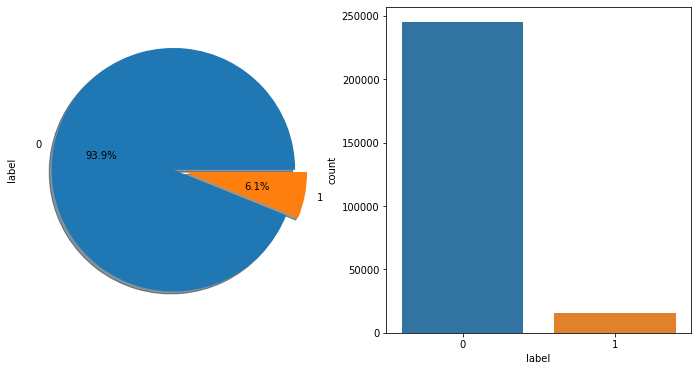

In [18]:
label_gp = train_data.groupby('label')['user_id'].count()
print('正负样本的数量：\n',label_gp)
_,axe = plt.subplots(1,2,figsize=(12,6))
train_data.label.value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0,0.1],ax=axe[0])
sns.countplot('label',data=train_data,ax=axe[1],)

## 探查店铺、用户、性别以及年龄对复购的影响

In [19]:
print('选取top5店铺\n店铺\t购买次数')
print(train_data.merchant_id.value_counts().head(5))

选取top5店铺
店铺	购买次数
4044    3379
3828    3254
4173    2542
1102    2483
4976    1925
Name: merchant_id, dtype: int64


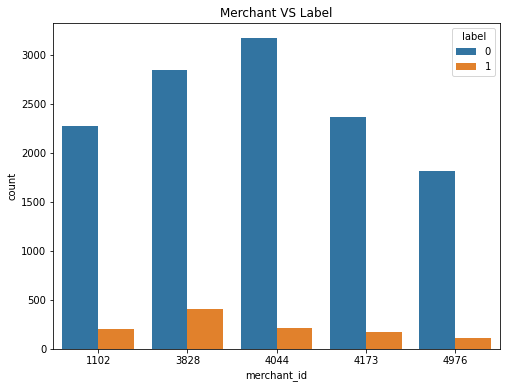

In [20]:
train_data_merchant = train_data.copy()
train_data_merchant['TOP5'] = train_data_merchant['merchant_id'].map(lambda x: 1 if x in [4044,3828,4173,1102,4976] else 0)
train_data_merchant = train_data_merchant[train_data_merchant['TOP5']==1]
plt.figure(figsize=(8,6))
plt.title('Merchant VS Label')
ax = sns.countplot('merchant_id',hue='label',data=train_data_merchant)
for p in ax.patches:
    height = p.get_height()

## ·查看店铺复购概率分布

<AxesSubplot:ylabel='Density'>

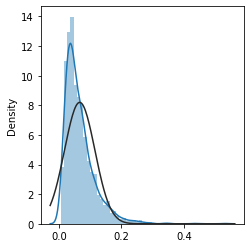

In [21]:
merchant_repeat_buy = [ rate for rate in train_data.groupby(['merchant_id'])['label'].mean() if rate <= 1 and rate > 0]
plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(merchant_repeat_buy, fit=stats.norm)

## ·查看用户性别与复购的关系

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0,6.0,0.0
1,34176,121,0,6.0,0.0
2,34176,4356,1,6.0,0.0
3,34176,2217,0,6.0,0.0
4,230784,4818,0,0.0,0.0
5,362112,2618,0,4.0,1.0
6,34944,2051,0,5.0,0.0
7,231552,3828,1,5.0,0.0
8,231552,2124,0,5.0,0.0
9,232320,1168,0,4.0,1.0


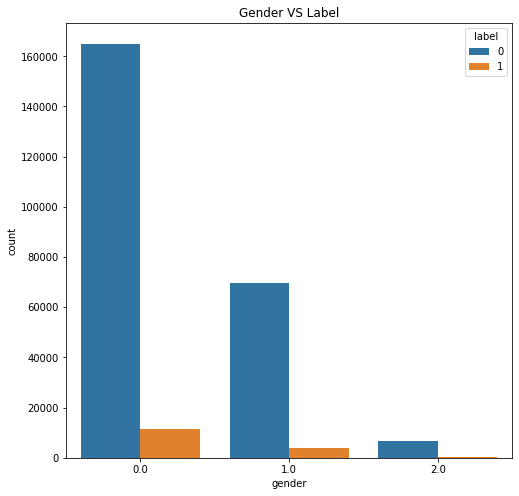

In [22]:
train_data_user_info = train_data.merge(user_info,on=['user_id'],how='left')
plt.figure(figsize=(8,8))
plt.title('Gender VS Label')
ax = sns.countplot('gender',hue='label',data=train_data_user_info)
for p in ax.patches:
    height = p.get_height()
train_data_user_info.head(10)

## ·查看用户性别复购的分布

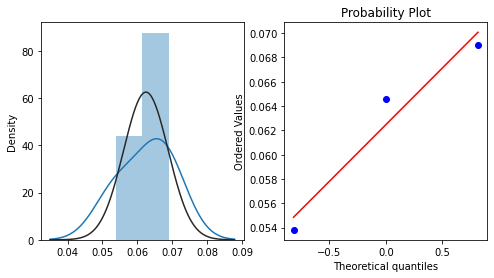

In [23]:
repeat_buy = [rate for rate in train_data_user_info.groupby(['gender'])['label'].mean()]
plt.figure(figsize=(8,4))

ax=plt.subplot(1,2,1)
sns.distplot(repeat_buy, fit=stats.norm)
ax=plt.subplot(1,2,2)
res = stats.probplot(repeat_buy, plot=plt)

# 特征工程

In [24]:
from scipy import stats
import gc
from collections import Counter
import copy

数据读取函数

In [25]:
def read_csv(file_name, num_rows):
    return pd.read_csv(file_name, nrows=num_rows)

## 内存压缩方法

In [26]:
# reduce memory
def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024**2
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

## 内存压缩

In [27]:
num_rows = None
num_rows = 200 * 10000 # 1000条测试代码使用
# num_rows = 1000

train_file = './data_format1/train_format1.csv'
test_file = './data_format1/test_format1.csv'

user_info_file = './data_format1/user_info_format1.csv'
user_log_file = './data_format1/user_log_format1.csv'

train_data = reduce_mem_usage(read_csv(train_file, num_rows))
test_data = reduce_mem_usage(read_csv(test_file, num_rows))

user_info = reduce_mem_usage(read_csv(user_info_file, num_rows))
user_log = reduce_mem_usage(read_csv(user_log_file, num_rows))

Memory usage after optimization is: 1.74 MB
Decreased by 70.8%
Memory usage after optimization is: 3.49 MB
Decreased by 41.7%
Memory usage after optimization is: 3.24 MB
Decreased by 66.7%
Memory usage after optimization is: 32.43 MB
Decreased by 69.6%


In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   user_id      260864 non-null  int32
 1   merchant_id  260864 non-null  int16
 2   label        260864 non-null  int8 
dtypes: int16(1), int32(1), int8(1)
memory usage: 1.7 MB


## 数据处理

### 合并所有数据

In [29]:
import gc
del test_data['prob']
all_data = train_data.append(test_data)
all_data = all_data.merge(user_info,on=['user_id'],how='left')
del train_data, test_data, user_info
gc.collect()

3573

In [30]:
all_data.head()

,user_id,merchant_id,label,age_range,gender
0,34176,3906,0.0,6.0,0.0
1,34176,121,0.0,6.0,0.0
2,34176,4356,1.0,6.0,0.0
3,34176,2217,0.0,6.0,0.0
4,230784,4818,0.0,0.0,0.0


### 数据按时间排序

In [31]:
"""
按时间排序
"""
user_log = user_log.sort_values(['user_id','time_stamp'])

### 合并字段

对每个用户的逐个合并所有的item_id, cat_id,seller_id,brand_id,time_stamp, action_type字段

In [32]:
"""
合并数据
"""
list_join_func = lambda x: " ".join([str(i) for i in x])


agg_dict = {
            'item_id' : list_join_func,
            'cat_id' : list_join_func,
            'seller_id' : list_join_func,
            'brand_id' : list_join_func,
            'time_stamp' : list_join_func,
            'action_type' : list_join_func
        }

rename_dict = {
            'item_id' : 'item_path',
            'cat_id' : 'cat_path',
            'seller_id' : 'seller_path',
            'brand_id' : 'brand_path',
            'time_stamp' : 'time_stamp_path',
            'action_type' : 'action_type_path'
        }

In [33]:
user_log_path = user_log.groupby('user_id').agg(agg_dict).reset_index().rename(columns=rename_dict)

In [34]:
user_log_path.head()

,user_id,item_path,cat_path,seller_path,brand_path,time_stamp_path,action_type_path
0,16,980982 980982 980982 962763 391126 827174 6731...,437 437 437 19 437 437 437 437 895 19 437 437 ...,650 650 650 650 650 650 650 650 3948 650 650 6...,4276.0 4276.0 4276.0 4276.0 4276.0 4276.0 4276...,914 914 914 914 914 914 914 914 914 914 914 91...,0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 ...
1,19,388018 388018 88673 88673 88673 88673 846066 5...,949 949 614 614 614 614 420 1401 948 948 513 1...,2772 2772 4066 4066 4066 4066 4951 4951 2872 2...,2112.0 2112.0 1552.0 1552.0 1552.0 1552.0 5200...,710 710 711 711 711 711 908 908 1105 1105 1105...,0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2,41,60215 1004605 60215 60215 60215 60215 628525 5...,1308 1308 1308 1308 1308 1308 1271 656 656 656...,2128 3207 2128 2128 2128 2128 3142 4618 4618 4...,3848.0 3848.0 3848.0 3848.0 3848.0 3848.0 1014...,521 521 521 521 521 522 529 828 828 828 828 82...,0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 ...
3,56,889499 528459 765746 553259 889499 22435 40047...,662 1075 662 1577 662 11 184 1604 11 11 177 11...,4048 601 3104 3828 4048 4766 2419 2768 2565 26...,5360.0 1040.0 8240.0 1446.0 5360.0 4360.0 3428...,517 520 525 528 602 602 610 610 610 610 610 61...,3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 ...
4,155,979639 890128 981780 211366 211366 797946 4567...,267 1271 1505 267 267 1075 1075 407 407 1075 4...,2429 4785 3784 800 800 1595 1418 2662 2662 315...,2276.0 1422.0 5692.0 6328.0 6328.0 5800.0 7140...,529 529 602 604 604 607 607 607 607 607 607 60...,0 0 0 2 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 2 ...


In [35]:
all_data_path = all_data.merge(user_log_path,on='user_id')
all_data_path.head()

,user_id,merchant_id,label,age_range,gender,item_path,cat_path,seller_path,brand_path,time_stamp_path,action_type_path
0,105600,1487,0.0,6.0,1.0,986160 681407 681407 910680 681407 592698 3693...,35 1554 1554 119 1554 662 1095 662 35 833 833 ...,4811 4811 4811 1897 4811 3315 2925 1340 1875 4...,127.0 127.0 127.0 4704.0 127.0 1605.0 6000.0 1...,518 518 518 520 520 524 524 524 525 525 525 52...,2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,110976,159,0.0,5.0,0.0,396970 961553 627712 926681 1012423 825576 149...,1023 420 407 1505 962 602 184 1606 351 1505 11...,1435 1648 223 3178 2418 1614 3004 2511 2285 78...,5504.0 7780.0 1751.0 7540.0 6652.0 8116.0 5328...,517 520 522 522 527 530 530 530 601 601 602 60...,2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 0 ...
2,374400,302,0.0,5.0,1.0,256546 202393 927572 2587 10956 549283 270303 ...,1188 646 1175 1188 1414 681 1175 681 681 115 1...,805 390 4252 3979 1228 2029 2029 2029 4252 923...,1842.0 5920.0 133.0 6304.0 7584.0 133.0 133.0 ...,517 604 604 604 607 609 609 609 609 615 621 62...,2 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,189312,1760,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
4,189312,2511,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [36]:
"""
删除不需要的数据
"""
del user_log
gc.collect()

16

### 方法集

统计数据的总数

In [38]:
def cnt_(x):
    try:
        return len(x.split(' '))
    except:
        return -1

统计唯一数据总数

In [39]:
def nunique_(x):
    try:
        return len(set(x.split(' ')))
    except:
        return -1

统计数据最大最小值

In [40]:
def max_(x):
    try:
        return np.max([int(i) for i in x.split(' ')])
    except:
        return -1
def min_(x):
    try:
        return np.min([int(i) for i in x.split(' ')])
    except:
        return -1

统计数据的标准差

In [41]:
def std_(x):
    try:
        return np.std([float(i) for i in x.split(' ')])
    except:
        return -1

统计数据中top N的数据或总数

In [42]:
def most_n(x, n):
    try:
        return Counter(x.split(' ')).most_common(n)[n-1][0]
    except:
        return -1
def most_n_cnt(x, n):
    try:
        return Counter(x.split(' ')).most_common(n)[n-1][1]
    except:
        return -1

In [43]:
def user_cnt(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(cnt_)
    return df_data

def user_nunique(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(nunique_)
    return df_data

def user_max(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(max_)
    return df_data

def user_min(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(min_)
    return df_data

def user_std(df_data, single_col, name):
    df_data[name] = df_data[single_col].apply(std_)
    return df_data

def user_most_n(df_data, single_col, name, n=1):
    func = lambda x: most_n(x, n)
    df_data[name] = df_data[single_col].apply(func)
    return df_data

def user_most_n_cnt(df_data, single_col, name, n=1):
    func = lambda x: most_n_cnt(x, n)
    df_data[name] = df_data[single_col].apply(func)
    return df_data

提取商铺的基本统计特征

In [44]:
"""
    提取基本统计特征
"""
all_data_test = all_data_path.head(2000)
#all_data_test = all_data_path
# 统计用户 点击、浏览、加购、购买行为
# 总次数
all_data_test = user_cnt(all_data_test,  'seller_path', 'user_cnt')
# 不同店铺个数
all_data_test = user_nunique(all_data_test,  'seller_path', 'seller_nunique')
# 不同品类个数
all_data_test = user_nunique(all_data_test,  'cat_path', 'cat_nunique')
# 不同品牌个数
all_data_test = user_nunique(all_data_test,  'brand_path', 'brand_nunique')
# 不同商品个数
all_data_test = user_nunique(all_data_test,  'item_path', 'item_nunique')
# 活跃天数
all_data_test = user_nunique(all_data_test,  'time_stamp_path', 'time_stamp_nunique')
# 不用行为种数
all_data_test = user_nunique(all_data_test,  'action_type_path', 'action_type_nunique')
# ....

In [45]:
all_data_test.head()

,user_id,merchant_id,label,age_range,gender,item_path,cat_path,seller_path,brand_path,time_stamp_path,action_type_path,user_cnt,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,action_type_nunique
0,105600,1487,0.0,6.0,1.0,986160 681407 681407 910680 681407 592698 3693...,35 1554 1554 119 1554 662 1095 662 35 833 833 ...,4811 4811 4811 1897 4811 3315 2925 1340 1875 4...,127.0 127.0 127.0 4704.0 127.0 1605.0 6000.0 1...,518 518 518 520 520 524 524 524 525 525 525 52...,2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,310,96,37,88,217,29,2
1,110976,159,0.0,5.0,0.0,396970 961553 627712 926681 1012423 825576 149...,1023 420 407 1505 962 602 184 1606 351 1505 11...,1435 1648 223 3178 2418 1614 3004 2511 2285 78...,5504.0 7780.0 1751.0 7540.0 6652.0 8116.0 5328...,517 520 522 522 527 530 530 530 601 601 602 60...,2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 2 0 ...,274,181,70,159,233,52,3
2,374400,302,0.0,5.0,1.0,256546 202393 927572 2587 10956 549283 270303 ...,1188 646 1175 1188 1414 681 1175 681 681 115 1...,805 390 4252 3979 1228 2029 2029 2029 4252 923...,1842.0 5920.0 133.0 6304.0 7584.0 133.0 133.0 ...,517 604 604 604 607 609 609 609 609 615 621 62...,2 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,278,57,59,62,148,35,3
3,189312,1760,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,237,49,35,45,170,9,2
4,189312,2511,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...,237,49,35,45,170,9,2


## 按照商铺分开统计

In [46]:
# 最晚时间
all_data_test = user_max(all_data_test,  'action_type_path', 'time_stamp_max')
# 最早时间
all_data_test = user_min(all_data_test,  'action_type_path', 'time_stamp_min')
# 活跃天数方差
all_data_test = user_std(all_data_test,  'action_type_path', 'time_stamp_std')
# 最早和最晚相差天数
all_data_test['time_stamp_range'] = all_data_test['time_stamp_max'] - all_data_test['time_stamp_min']

In [47]:
all_data_test.head()

,user_id,merchant_id,label,age_range,gender,item_path,cat_path,seller_path,brand_path,time_stamp_path,...,seller_nunique,cat_nunique,brand_nunique,item_nunique,time_stamp_nunique,action_type_nunique,time_stamp_max,time_stamp_min,time_stamp_std,time_stamp_range
0,105600,1487,0.0,6.0,1.0,986160 681407 681407 910680 681407 592698 3693...,35 1554 1554 119 1554 662 1095 662 35 833 833 ...,4811 4811 4811 1897 4811 3315 2925 1340 1875 4...,127.0 127.0 127.0 4704.0 127.0 1605.0 6000.0 1...,518 518 518 520 520 524 524 524 525 525 525 52...,...,96,37,88,217,29,2,2,0,0.369999,2
1,110976,159,0.0,5.0,0.0,396970 961553 627712 926681 1012423 825576 149...,1023 420 407 1505 962 602 184 1606 351 1505 11...,1435 1648 223 3178 2418 1614 3004 2511 2285 78...,5504.0 7780.0 1751.0 7540.0 6652.0 8116.0 5328...,517 520 522 522 527 530 530 530 601 601 602 60...,...,181,70,159,233,52,3,3,0,0.557857,3
2,374400,302,0.0,5.0,1.0,256546 202393 927572 2587 10956 549283 270303 ...,1188 646 1175 1188 1414 681 1175 681 681 115 1...,805 390 4252 3979 1228 2029 2029 2029 4252 923...,1842.0 5920.0 133.0 6304.0 7584.0 133.0 133.0 ...,517 604 604 604 607 609 609 609 609 615 621 62...,...,57,59,62,148,35,3,3,0,0.767630,3
3,189312,1760,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,...,49,35,45,170,9,2,2,0,0.382270,2
4,189312,2511,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,...,49,35,45,170,9,2,2,0,0.382270,2


In [48]:
# 用户最喜欢的店铺
all_data_test = user_most_n(all_data_test, 'seller_path', 'seller_most_1', n=1)
# 最喜欢的类目
all_data_test = user_most_n(all_data_test, 'cat_path', 'cat_most_1', n=1)
# 最喜欢的品牌
all_data_test = user_most_n(all_data_test, 'brand_path', 'brand_most_1', n=1)
# 最常见的行为动作
all_data_test = user_most_n(all_data_test, 'action_type_path', 'action_type_1', n=1)
# .....

In [50]:
# 用户最喜欢的店铺 行为次数
all_data_test = user_most_n_cnt(all_data_test, 'seller_path', 'seller_most_1_cnt', n=1)
# 最喜欢的类目 行为次数
all_data_test = user_most_n_cnt(all_data_test, 'cat_path', 'cat_most_1_cnt', n=1)
# 最喜欢的品牌 行为次数
all_data_test = user_most_n_cnt(all_data_test, 'brand_path', 'brand_most_1_cnt', n=1)
# 最常见的行为动作 行为次数
all_data_test = user_most_n_cnt(all_data_test, 'action_type_path', 'action_type_1_cnt', n=1)
# .....

## 分开统计各用户的点击，加购，购买，收藏

### 不同行为的业务函数定义

In [49]:
# 点击、加购、购买、收藏 分开统计
"""
统计基本特征函数
-- 知识点二
-- 根据不同行为的业务函数
-- 提取不同特征
"""
def col_cnt_(df_data, columns_list, action_type):
    try:
        data_dict = {}

        col_list = copy.deepcopy(columns_list)
        if action_type != None:
            col_list += ['action_type_path']

        for col in col_list:
            data_dict[col] = df_data[col].split(' ')

        path_len = len(data_dict[col])

        data_out = []
        for i_ in range(path_len):
            data_txt = ''
            for col_ in columns_list:
                if data_dict['action_type_path'][i_] == action_type:
                    data_txt += '_' + data_dict[col_][i_]
            data_out.append(data_txt)

        return len(data_out)
    except:
        return -1

def col_nuique_(df_data, columns_list, action_type):
    try:
        data_dict = {}

        col_list = copy.deepcopy(columns_list)
        if action_type != None:
            col_list += ['action_type_path']

        for col in col_list:
            data_dict[col] = df_data[col].split(' ')

        path_len = len(data_dict[col])

        data_out = []
        for i_ in range(path_len):
            data_txt = ''
            for col_ in columns_list:
                if data_dict['action_type_path'][i_] == action_type:
                    data_txt += '_' + data_dict[col_][i_]
            data_out.append(data_txt)

        return len(set(data_out))
    except:
        return -1


def user_col_cnt(df_data, columns_list, action_type, name):
    df_data[name] = df_data.apply(lambda x: col_cnt_(x, columns_list, action_type), axis=1)
    return df_data

def user_col_nunique(df_data, columns_list, action_type, name):
    df_data[name] = df_data.apply(lambda x: col_nuique_(x, columns_list, action_type), axis=1)
    return df_data

In [51]:
# 点击次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path'], '0', 'user_cnt_0')
# 加购次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path'], '1', 'user_cnt_1')
# 购买次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path'], '2', 'user_cnt_2')
# 收藏次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path'], '3', 'user_cnt_3')


# 不同店铺个数
all_data_test = user_col_nunique(all_data_test,  ['seller_path'], '0', 'seller_nunique_0')
# ....

In [52]:
all_data_test.head()

,user_id,merchant_id,label,age_range,gender,item_path,cat_path,seller_path,brand_path,time_stamp_path,...,action_type_1,seller_most_1_cnt,cat_most_1_cnt,brand_most_1_cnt,action_type_1_cnt,user_cnt_0,user_cnt_1,user_cnt_2,user_cnt_3,seller_nunique_0
0,105600,1487,0.0,6.0,1.0,986160 681407 681407 910680 681407 592698 3693...,35 1554 1554 119 1554 662 1095 662 35 833 833 ...,4811 4811 4811 1897 4811 3315 2925 1340 1875 4...,127.0 127.0 127.0 4704.0 127.0 1605.0 6000.0 1...,518 518 518 520 520 524 524 524 525 525 525 52...,...,0,35,43,35,299,310,310,310,310,97
1,110976,159,0.0,5.0,0.0,396970 961553 627712 926681 1012423 825576 149...,1023 420 407 1505 962 602 184 1606 351 1505 11...,1435 1648 223 3178 2418 1614 3004 2511 2285 78...,5504.0 7780.0 1751.0 7540.0 6652.0 8116.0 5328...,517 520 522 522 527 530 530 530 601 601 602 60...,...,0,9,56,11,259,274,274,274,274,181
2,374400,302,0.0,5.0,1.0,256546 202393 927572 2587 10956 549283 270303 ...,1188 646 1175 1188 1414 681 1175 681 681 115 1...,805 390 4252 3979 1228 2029 2029 2029 4252 923...,1842.0 5920.0 133.0 6304.0 7584.0 133.0 133.0 ...,517 604 604 604 607 609 609 609 609 615 621 62...,...,0,93,29,48,241,278,278,278,278,56
3,189312,1760,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,...,0,45,68,45,228,237,237,237,237,50
4,189312,2511,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,...,0,45,68,45,228,237,237,237,237,50


## 组合特征

In [53]:
# 点击次数
all_data_test = user_col_cnt(all_data_test,  ['seller_path', 'item_path'], '0', 'user_cnt_0')

# 不同店铺个数
all_data_test = user_col_nunique(all_data_test,  ['seller_path', 'item_path'], '0', 'seller_nunique_0')

In [54]:
list(all_data_test.columns)

['user_id',
 'merchant_id',
 'label',
 'age_range',
 'gender',
 'item_path',
 'cat_path',
 'seller_path',
 'brand_path',
 'time_stamp_path',
 'action_type_path',
 'user_cnt',
 'seller_nunique',
 'cat_nunique',
 'brand_nunique',
 'item_nunique',
 'time_stamp_nunique',
 'action_type_nunique',
 'time_stamp_max',
 'time_stamp_min',
 'time_stamp_std',
 'time_stamp_range',
 'seller_most_1',
 'cat_most_1',
 'brand_most_1',
 'action_type_1',
 'seller_most_1_cnt',
 'cat_most_1_cnt',
 'brand_most_1_cnt',
 'action_type_1_cnt',
 'user_cnt_0',
 'user_cnt_1',
 'user_cnt_2',
 'user_cnt_3',
 'seller_nunique_0']

### 利用countvector，tfidf提取特征

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, ENGLISH_STOP_WORDS
from scipy import sparse
# cntVec = CountVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 1), max_features=100)
tfidfVec = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, ngram_range=(1, 1), max_features=100)

# columns_list = ['seller_path', 'cat_path', 'brand_path', 'action_type_path', 'item_path', 'time_stamp_path']
columns_list = ['seller_path']
for i, col in enumerate(columns_list):
    all_data_test[col] = all_data_test[col].astype(str)
    tfidfVec.fit(all_data_test[col])
    data_ = tfidfVec.transform(all_data_test[col])
    if i == 0:
        data_cat = data_
    else:
        data_cat = sparse.hstack((data_cat, data_))

### 为特征重命名，合并

In [56]:
df_tfidf = pd.DataFrame(data_cat.toarray())
df_tfidf.columns = ['tfidf_' + str(i) for i in df_tfidf.columns]
all_data_test = pd.concat([all_data_test, df_tfidf],axis=1)

In [57]:
all_data_test.head()

,user_id,merchant_id,label,age_range,gender,item_path,cat_path,seller_path,brand_path,time_stamp_path,...,tfidf_90,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99
0,105600,1487,0.0,6.0,1.0,986160 681407 681407 910680 681407 592698 3693...,35 1554 1554 119 1554 662 1095 662 35 833 833 ...,4811 4811 4811 1897 4811 3315 2925 1340 1875 4...,127.0 127.0 127.0 4704.0 127.0 1605.0 6000.0 1...,518 518 518 520 520 524 524 524 525 525 525 52...,...,0.0,0.000000,0.0,0.115594,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,110976,159,0.0,5.0,0.0,396970 961553 627712 926681 1012423 825576 149...,1023 420 407 1505 962 602 184 1606 351 1505 11...,1435 1648 223 3178 2418 1614 3004 2511 2285 78...,5504.0 7780.0 1751.0 7540.0 6652.0 8116.0 5328...,517 520 522 522 527 530 530 530 601 601 602 60...,...,0.0,0.151756,0.0,0.000000,0.438598,0.0,0.163503,0.0,0.000000,0.0
2,374400,302,0.0,5.0,1.0,256546 202393 927572 2587 10956 549283 270303 ...,1188 646 1175 1188 1414 681 1175 681 681 115 1...,805 390 4252 3979 1228 2029 2029 2029 4252 923...,1842.0 5920.0 133.0 6304.0 7584.0 133.0 133.0 ...,517 604 604 604 607 609 609 609 609 615 621 62...,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.203564,0.0
3,189312,1760,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,...,0.0,0.000000,0.0,0.000000,0.053659,0.0,0.015003,0.0,0.000000,0.0
4,189312,2511,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,...,0.0,0.000000,0.0,0.000000,0.053659,0.0,0.015003,0.0,0.000000,0.0


## embeeding特征

In [59]:
import gensim

# Train Word2Vec model

model = gensim.models.Word2Vec(all_data_test['seller_path'].apply(lambda x: x.split(' ')), window=5, min_count=5, workers=4)
# model.save("product2vec.model")
# model = gensim.models.Word2Vec.load("product2vec.model")

def mean_w2v_(x, model, size=100):
    try:
        i = 0
        for word in x.split(' '):
            if word in model.wv.vocab:
                i += 1
                if i == 1:
                    vec = np.zeros(size)
                vec += model.wv[word]
        return vec / i
    except:
        return  np.zeros(size)


def get_mean_w2v(df_data, columns, model, size):
    data_array = []
    for index, row in df_data.iterrows():
        w2v = mean_w2v_(row[columns], model, size)
        data_array.append(w2v)
    return pd.DataFrame(data_array)

df_embeeding = get_mean_w2v(all_data_test, 'seller_path', model, 100)
df_embeeding.columns = ['embeeding_' + str(i) for i in df_embeeding.columns]

In [60]:
all_data_test = pd.concat([all_data_test, df_embeeding],axis=1)

In [61]:
all_data_test.head()

,user_id,merchant_id,label,age_range,gender,item_path,cat_path,seller_path,brand_path,time_stamp_path,...,embeeding_90,embeeding_91,embeeding_92,embeeding_93,embeeding_94,embeeding_95,embeeding_96,embeeding_97,embeeding_98,embeeding_99
0,105600,1487,0.0,6.0,1.0,986160 681407 681407 910680 681407 592698 3693...,35 1554 1554 119 1554 662 1095 662 35 833 833 ...,4811 4811 4811 1897 4811 3315 2925 1340 1875 4...,127.0 127.0 127.0 4704.0 127.0 1605.0 6000.0 1...,518 518 518 520 520 524 524 524 525 525 525 52...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,110976,159,0.0,5.0,0.0,396970 961553 627712 926681 1012423 825576 149...,1023 420 407 1505 962 602 184 1606 351 1505 11...,1435 1648 223 3178 2418 1614 3004 2511 2285 78...,5504.0 7780.0 1751.0 7540.0 6652.0 8116.0 5328...,517 520 522 522 527 530 530 530 601 601 602 60...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,374400,302,0.0,5.0,1.0,256546 202393 927572 2587 10956 549283 270303 ...,1188 646 1175 1188 1414 681 1175 681 681 115 1...,805 390 4252 3979 1228 2029 2029 2029 4252 923...,1842.0 5920.0 133.0 6304.0 7584.0 133.0 133.0 ...,517 604 604 604 607 609 609 609 609 615 621 62...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,189312,1760,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,189312,2511,0.0,4.0,0.0,290583 166235 556025 217894 166235 556025 5589...,601 601 601 601 601 601 601 601 601 601 601 60...,3139 3139 3524 3139 3139 3524 3139 3139 3139 3...,549.0 549.0 549.0 549.0 549.0 549.0 549.0 549....,924 924 924 924 924 924 924 924 924 924 924 92...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## stacking特征

In [62]:
"""
-- 知识点六
-- stacking特征
"""
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from scipy import sparse
import xgboost
import lightgbm
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss,mean_absolute_error,mean_squared_error
from sklearn.naive_bayes import MultinomialNB,GaussianNB

### stacking 回归特征

In [67]:
"""
-- 回归
-- stacking 回归特征
"""
def stacking_reg(clf,train_x,train_y,test_x,clf_name,kf,label_split=None):
    train=np.zeros((train_x.shape[0],1))
    test=np.zeros((test_x.shape[0],1))
    test_pre=np.empty((folds,test_x.shape[0],1))
    cv_scores=[]
    for i,(train_index,test_index) in enumerate(kf.split(train_x,label_split)):
        tr_x=train_x[train_index]
        tr_y=train_y[train_index]
        te_x=train_x[test_index]
        te_y = train_y[test_index]
        if clf_name in ["rf","ada","gb","et","lr"]:
            clf.fit(tr_x,tr_y)
            pre=clf.predict(te_x).reshape(-1,1)
            train[test_index]=pre
            test_pre[i,:]=clf.predict(test_x).reshape(-1,1)
            cv_scores.append(mean_squared_error(te_y, pre))
        elif clf_name in ["xgb"]:
            train_matrix = clf.DMatrix(tr_x, label=tr_y, missing=-1)
            test_matrix = clf.DMatrix(te_x, label=te_y, missing=-1)
            z = clf.DMatrix(test_x, label=te_y, missing=-1)
            params = {'booster': 'gbtree',
                      'eval_metric': 'rmse',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      'nthread': 12
                      }
            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'),
                         (test_matrix, 'eval')
                         ]
            if test_matrix:
                model = clf.train(params, train_matrix, num_boost_round=num_round,evals=watchlist,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(test_matrix,ntree_limit=model.best_ntree_limit).reshape(-1,1)
                train[test_index]=pre
                test_pre[i, :]= model.predict(z, ntree_limit=model.best_ntree_limit).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y, pre))

        elif clf_name in ["lgb"]:
            train_matrix = clf.Dataset(tr_x, label=tr_y)
            test_matrix = clf.Dataset(te_x, label=te_y)
            params = {
                      'boosting_type': 'gbdt',
                      'objective': 'regression_l2',
                      'metric': 'mse',
                      'min_child_weight': 1.5,
                      'num_leaves': 2**5,
                      'lambda_l2': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'learning_rate': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      'nthread': 12,
                      'silent': True,
                      }
            num_round = 10000
            early_stopping_rounds = 100
            if test_matrix:
                model = clf.train(params, train_matrix,num_round,valid_sets=test_matrix,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(te_x,num_iteration=model.best_iteration).reshape(-1,1)
                train[test_index]=pre
                test_pre[i, :]= model.predict(test_x, num_iteration=model.best_iteration).reshape(-1,1)
                cv_scores.append(mean_squared_error(te_y, pre))
        else:
            raise IOError("Please add new clf.")
        print("%s now score is:"%clf_name,cv_scores)
    test[:]=test_pre.mean(axis=0)
    print("%s_score_list:"%clf_name,cv_scores)
    print("%s_score_mean:"%clf_name,np.mean(cv_scores))
    return train.reshape(-1,1),test.reshape(-1,1)

def rf_reg(x_train, y_train, x_valid, kf, label_split=None):
    randomforest = RandomForestRegressor(n_estimators=600, max_depth=20, n_jobs=-1, random_state=2017, max_features="auto",verbose=1)
    rf_train, rf_test = stacking_reg(randomforest, x_train, y_train, x_valid, "rf", kf, label_split=label_split)
    return rf_train, rf_test,"rf_reg"

def ada_reg(x_train, y_train, x_valid, kf, label_split=None):
    adaboost = AdaBoostRegressor(n_estimators=30, random_state=2017, learning_rate=0.01)
    ada_train, ada_test = stacking_reg(adaboost, x_train, y_train, x_valid, "ada", kf, label_split=label_split)
    return ada_train, ada_test,"ada_reg"

def gb_reg(x_train, y_train, x_valid, kf, label_split=None):
    gbdt = GradientBoostingRegressor(learning_rate=0.04, n_estimators=100, subsample=0.8, random_state=2017,max_depth=5,verbose=1)
    gbdt_train, gbdt_test = stacking_reg(gbdt, x_train, y_train, x_valid, "gb", kf, label_split=label_split)
    return gbdt_train, gbdt_test,"gb_reg"

def et_reg(x_train, y_train, x_valid, kf, label_split=None):
    extratree = ExtraTreesRegressor(n_estimators=600, max_depth=35, max_features="auto", n_jobs=-1, random_state=2017,verbose=1)
    et_train, et_test = stacking_reg(extratree, x_train, y_train, x_valid, "et", kf, label_split=label_split)
    return et_train, et_test,"et_reg"

def lr_reg(x_train, y_train, x_valid, kf, label_split=None):
    lr_reg=LinearRegression(n_jobs=-1)
    lr_train, lr_test = stacking_reg(lr_reg, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return lr_train, lr_test, "lr_reg"

def xgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_reg(xgboost, x_train, y_train, x_valid, "xgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"xgb_reg"

def lgb_reg(x_train, y_train, x_valid, kf, label_split=None):
    lgb_train, lgb_test = stacking_reg(lightgbm, x_train, y_train, x_valid, "lgb", kf, label_split=label_split)
    return lgb_train, lgb_test,"lgb_reg"

### stacking 分类特征

In [68]:
"""
-- 分类
-- stacking 分类特征
"""
def stacking_clf(clf,train_x,train_y,test_x,clf_name,kf,label_split=None):
    train=np.zeros((train_x.shape[0],1))
    test=np.zeros((test_x.shape[0],1))
    test_pre=np.empty((folds,test_x.shape[0],1))
    cv_scores=[]
    for i,(train_index,test_index) in enumerate(kf.split(train_x,label_split)):
        tr_x=train_x[train_index]
        tr_y=train_y[train_index]
        te_x=train_x[test_index]
        te_y = train_y[test_index]

        if clf_name in ["rf","ada","gb","et","lr","knn","gnb"]:
            clf.fit(tr_x,tr_y)
            pre=clf.predict_proba(te_x)

            train[test_index]=pre[:,0].reshape(-1,1)
            test_pre[i,:]=clf.predict_proba(test_x)[:,0].reshape(-1,1)

            cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        elif clf_name in ["xgb"]:
            train_matrix = clf.DMatrix(tr_x, label=tr_y, missing=-1)
            test_matrix = clf.DMatrix(te_x, label=te_y, missing=-1)
            z = clf.DMatrix(test_x)
            params = {'booster': 'gbtree',
                      'objective': 'multi:softprob',
                      'eval_metric': 'mlogloss',
                      'gamma': 1,
                      'min_child_weight': 1.5,
                      'max_depth': 5,
                      'lambda': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'eta': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      "num_class": 2
                      }

            num_round = 10000
            early_stopping_rounds = 100
            watchlist = [(train_matrix, 'train'),
                         (test_matrix, 'eval')
                         ]
            if test_matrix:
                model = clf.train(params, train_matrix, num_boost_round=num_round,evals=watchlist,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(test_matrix,ntree_limit=model.best_ntree_limit)
                train[test_index]=pre[:,0].reshape(-1,1)
                test_pre[i, :]= model.predict(z, ntree_limit=model.best_ntree_limit)[:,0].reshape(-1,1)
                cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        elif clf_name in ["lgb"]:
            train_matrix = clf.Dataset(tr_x, label=tr_y)
            test_matrix = clf.Dataset(te_x, label=te_y)
            params = {
                      'boosting_type': 'gbdt',
                      #'boosting_type': 'dart',
                      'objective': 'multiclass',
                      'metric': 'multi_logloss',
                      'min_child_weight': 1.5,
                      'num_leaves': 2**5,
                      'lambda_l2': 10,
                      'subsample': 0.7,
                      'colsample_bytree': 0.7,
                      'colsample_bylevel': 0.7,
                      'learning_rate': 0.03,
                      'tree_method': 'exact',
                      'seed': 2017,
                      "num_class": 2,
                      'silent': True,
                      }
            num_round = 10000
            early_stopping_rounds = 100
            if test_matrix:
                model = clf.train(params, train_matrix,num_round,valid_sets=test_matrix,
                                  early_stopping_rounds=early_stopping_rounds
                                  )
                pre= model.predict(te_x,num_iteration=model.best_iteration)
                train[test_index]=pre[:,0].reshape(-1,1)
                test_pre[i, :]= model.predict(test_x, num_iteration=model.best_iteration)[:,0].reshape(-1,1)
                cv_scores.append(log_loss(te_y, pre[:,0].reshape(-1,1)))
        else:
            raise IOError("Please add new clf.")
        print("%s now score is:"%clf_name,cv_scores)
    test[:]=test_pre.mean(axis=0)
    print("%s_score_list:"%clf_name,cv_scores)
    print("%s_score_mean:"%clf_name,np.mean(cv_scores))
    return train.reshape(-1,1),test.reshape(-1,1)

def rf_clf(x_train, y_train, x_valid, kf, label_split=None):
    randomforest = RandomForestClassifier(n_estimators=1200, max_depth=20, n_jobs=-1, random_state=2017, max_features="auto",verbose=1)
    rf_train, rf_test = stacking_clf(randomforest, x_train, y_train, x_valid, "rf", kf, label_split=label_split)
    return rf_train, rf_test,"rf"

def ada_clf(x_train, y_train, x_valid, kf, label_split=None):
    adaboost = AdaBoostClassifier(n_estimators=50, random_state=2017, learning_rate=0.01)
    ada_train, ada_test = stacking_clf(adaboost, x_train, y_train, x_valid, "ada", kf, label_split=label_split)
    return ada_train, ada_test,"ada"

def gb_clf(x_train, y_train, x_valid, kf, label_split=None):
    gbdt = GradientBoostingClassifier(learning_rate=0.04, n_estimators=100, subsample=0.8, random_state=2017,max_depth=5,verbose=1)
    gbdt_train, gbdt_test = stacking_clf(gbdt, x_train, y_train, x_valid, "gb", kf, label_split=label_split)
    return gbdt_train, gbdt_test,"gb"

def et_clf(x_train, y_train, x_valid, kf, label_split=None):
    extratree = ExtraTreesClassifier(n_estimators=1200, max_depth=35, max_features="auto", n_jobs=-1, random_state=2017,verbose=1)
    et_train, et_test = stacking_clf(extratree, x_train, y_train, x_valid, "et", kf, label_split=label_split)
    return et_train, et_test,"et"

def xgb_clf(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_clf(xgboost, x_train, y_train, x_valid, "xgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"xgb"

def lgb_clf(x_train, y_train, x_valid, kf, label_split=None):
    xgb_train, xgb_test = stacking_clf(lightgbm, x_train, y_train, x_valid, "lgb", kf, label_split=label_split)
    return xgb_train, xgb_test,"lgb"

def gnb_clf(x_train, y_train, x_valid, kf, label_split=None):
    gnb=GaussianNB()
    gnb_train, gnb_test = stacking_clf(gnb, x_train, y_train, x_valid, "gnb", kf, label_split=label_split)
    return gnb_train, gnb_test,"gnb"

def lr_clf(x_train, y_train, x_valid, kf, label_split=None):
    logisticregression=LogisticRegression(n_jobs=-1,random_state=2017,C=0.1,max_iter=200)
    lr_train, lr_test = stacking_clf(logisticregression, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return lr_train, lr_test, "lr"

def knn_clf(x_train, y_train, x_valid, kf, label_split=None):
    kneighbors=KNeighborsClassifier(n_neighbors=200,n_jobs=-1)
    knn_train, knn_test = stacking_clf(kneighbors, x_train, y_train, x_valid, "lr", kf, label_split=label_split)
    return knn_train, knn_test, "knn"

### 获取训练和验证数据(为stacking特征做准备)

In [63]:
features_columns = [c for c in all_data_test.columns if c not in ['label', 'prob', 'seller_path', 'cat_path', 'brand_path', 'action_type_path', 'item_path', 'time_stamp_path']]
x_train = all_data_test[~all_data_test['label'].isna()][features_columns].values
y_train = all_data_test[~all_data_test['label'].isna()]['label'].values
x_valid = all_data_test[all_data_test['label'].isna()][features_columns].values

### 处理函数值inf以及nan情况

In [64]:
def get_matrix(data):
    where_are_nan = np.isnan(data)
    where_are_inf = np.isinf(data)
    data[where_are_nan] = 0
    data[where_are_inf] = 0
    return data
x_train = np.float_(get_matrix(np.float_(x_train)))
y_train = np.int_(y_train)
x_valid = x_train

### 导入划分数据函数 设stacking特征为5折

In [65]:
from sklearn.model_selection import StratifiedKFold, KFold
folds = 5
seed = 1
kf = KFold(n_splits=5, shuffle=True, random_state=0)

### 使用lgb和xgb分类模型构造stacking特征

In [69]:
# clf_list = [lgb_clf, xgb_clf, lgb_reg, xgb_reg]
# clf_list_col = ['lgb_clf', 'xgb_clf', 'lgb_reg', 'xgb_reg']

clf_list = [lgb_clf, xgb_clf]
clf_list_col = ['lgb_clf', 'xgb_clf']

### 训练模型，获取stacking特征

In [70]:
clf_list = clf_list
column_list = []
train_data_list=[]
test_data_list=[]
for clf in clf_list:
    train_data,test_data,clf_name=clf(x_train, y_train, x_valid, kf, label_split=None)
    train_data_list.append(train_data)
    test_data_list.append(test_data)
train_stacking = np.concatenate(train_data_list, axis=1)
test_stacking = np.concatenate(test_data_list, axis=1)

[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003713 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7149
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 127
[LightGBM] [Warning] Unknown parameter: colsample_bylevel
[LightGBM] [Warning] Unknown parameter: tree_method
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Start training from score -0.065873
[LightGBM] [Info] Start training from score -2.752786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

### 原始特征和stacking特征合并

In [71]:
# # 合并所有特征
train = pd.DataFrame(np.concatenate([x_train, train_stacking], axis=1))
test = np.concatenate([x_valid, test_stacking], axis=1)

### 特征重命名，获取数据ID以及特征标签LABEL

In [72]:
df_train_all = pd.DataFrame(train)
df_train_all.columns = features_columns + clf_list_col
df_test_all = pd.DataFrame(test)
df_test_all.columns = features_columns + clf_list_col
df_train_all['label'] = all_data_test['label']

In [73]:
df_train_all.to_csv('train_all.csv',header=True,index=False)
df_test_all.to_csv('test_all.csv',header=True,index=False)